# Assignment #1: Pseudonymisation Techniques and Considerations
- Dataset: Crossfit [Daset](https://data.world/bgadoci/crossfit-data) (In this assignment only the athletes file was used) 
- Credits: Dataset was put together by Sam Swift
- ToDo: To run the jupyter notebook the requirements.txt need be installed (`pip install -r requirements.txt`)

In [1]:
import pandas as pd

# Read csv as dataframe
dataframe = pd.read_csv("athletes.csv")

#dataframe["test"] = dataframe["height"]
#dataframe["height"] = dataframe["weight"]
#dataframe["weight"] = dataframe["test"]

#dataframe = dataframe.drop(columns=['test'])

#dataframe.to_csv('athletes_new.csv', index=False)
print(dataframe.iloc[:4])

   athlete_id           name               region          team  \
0      2554.0      Pj Ablang           South West   Double Edge   
1      3517.0  Derek Abdella                  NaN           NaN   
2      4691.0            NaN                  NaN           NaN   
3      5164.0    Abo Brandon  Southern California  LAX CrossFit   

              affiliate gender   age  height  weight   fran  ...  deadlift  \
0  Double Edge CrossFit   Male  24.0   166.0    70.0    NaN  ...     400.0   
1                   NaN   Male  42.0   190.0    70.0    NaN  ...       NaN   
2                   NaN    NaN   NaN     NaN     NaN    NaN  ...       NaN   
3          LAX CrossFit   Male  40.0     NaN    67.0  211.0  ...     375.0   

   backsq  pullups                                   eat  \
0   305.0      NaN                                   NaN   
1     NaN      NaN                                   NaN   
2     NaN      NaN                                   NaN   
3   325.0     25.0  I eat 1-3 ful

/var/folders/4p/4kctgn5n2378x2bnhkqv4xpc0000gn/T/ipykernel_1332/3265770945.py:4: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("athletes.csv")


### 3.1.1 Identifying Attributes containing Personally Identifiable Information (PII)
- In order to identify th attributes first a better understanding of the structure of the dataset needs to be obtained
    - What columns does the dataset contain and in what format are the attribute values?
        - Therefore, each column and the first value of each column (which is not empty or Null) is printed

In [2]:
def get_first_not_not_empty_value(df_column):
    return df_column.dropna().iloc[0] if not df_column.dropna().empty else None

# Iterate each column 
for column in dataframe.columns:
    first_value = get_first_not_not_empty_value(dataframe[column])
    print(f"Column: '{column}', Example Data: {first_value}")

Column: 'athlete_id', Example Data: 2554.0
Column: 'name', Example Data: Pj Ablang
Column: 'region', Example Data: South West
Column: 'team', Example Data: Double Edge
Column: 'affiliate', Example Data: Double Edge CrossFit
Column: 'gender', Example Data: Male
Column: 'age', Example Data: 24.0
Column: 'height', Example Data: 166.0
Column: 'weight', Example Data: 70.0
Column: 'fran', Example Data: 211.0
Column: 'helen', Example Data: 645.0
Column: 'grace', Example Data: 300.0
Column: 'filthy50', Example Data: 1053.0
Column: 'fgonebad', Example Data: 0.0
Column: 'run400', Example Data: 61.0
Column: 'run5k', Example Data: 1081.0
Column: 'candj', Example Data: 220.0
Column: 'snatch', Example Data: 200.0
Column: 'deadlift', Example Data: 400.0
Column: 'backsq', Example Data: 305.0
Column: 'pullups', Example Data: 25.0
Column: 'eat', Example Data: I eat 1-3 full cheat meals per week|
Column: 'train', Example Data: I workout mostly at a CrossFit Affiliate|I have a coach who determines my prog

- By inspecting the different columns and the data format, several attributes which have the potential to contain explicit personally identifiable information can be identified
    - `athelete_id`
        -  This really depends on the usage of this id! Considerations to take into account are: 
            - Is the `athlete_id` only used as an internal id of this dataset or does it maybe even refer to an official id?
            - Are there other datasets available which may have a similar source to this dataset? Thus, these other datasets may use the same `athlete_id`
    - `name`
        - The name allows to identify an individual
    - `team`
        - Depending on the size of the team, this could allow to identify a specific athlete
    - `affiliate` 
        - Depending on the affiliate and the amount of contracted athletes, this could allow to identify an individual
    - All stats of the athletes
        - If an athlete has really remarkable stats (maybe even a world record in a category), this could allow to identify the individual
    - `train` 
        - If an athlete has a special and famous training routine, this could allow to identify him
    - `background`
        - If an athlete has a famous background or mentions names, this could allow to identify him
    - `experience`
        - If an athlete mentions concrete information about his experience (e.g. name of current coach), this could allow to identify him

-> As can be seen, all columns could potentially contain outliers which could be then used to identify an individual. As agreed on, for each of the columns (only those holding numbers or names) potentially leaking PII one anonymization technique was chosen which keeps the data loss as minimal as possible without leaking obvious PII. It is important to note, that there could still be columns containing PII. However, this chance for outliers was accepted in this assignment. Columns containing descriptions (e.g. train, background and experience) where to anonymized and thus the chance for outliers accepted.

### 3.1.2 Pseudonymizing
- For pseudonymisation especially the name is suitable, because it can be easily replaced with a fake name, without being as obvious or destroying the purpose of the dataset
- With the help of the `anonymizedf` library new fake names can be created for the `name` column

In [3]:
from anonymizedf import anonymizedf

# Prepare the data to be anonymized
an = anonymizedf.anonymize(dataframe)

# Add new column with fake name
an.fake_names("name")

# Drop old original name column
dataframe = dataframe.drop(columns=['name'])

# Rename Fake_name column in name
dataframe = dataframe.rename(columns={'Fake_name': 'name'})

print(dataframe.iloc[:4])

   athlete_id               region          team             affiliate gender  \
0      2554.0           South West   Double Edge  Double Edge CrossFit   Male   
1      3517.0                  NaN           NaN                   NaN   Male   
2      4691.0                  NaN           NaN                   NaN    NaN   
3      5164.0  Southern California  LAX CrossFit          LAX CrossFit   Male   

    age  height  weight   fran  helen  ...  backsq  pullups  \
0  24.0   166.0    70.0    NaN    NaN  ...   305.0      NaN   
1  42.0   190.0    70.0    NaN    NaN  ...     NaN      NaN   
2   NaN     NaN     NaN    NaN    NaN  ...     NaN      NaN   
3  40.0     NaN    67.0  211.0  645.0  ...   325.0     25.0   

                                    eat  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3  I eat 1-3 full cheat meals per week|   

                                               train  \
0  I w

## 3.2 Randomisation
Goal:
- Use randomisation technique to generate random strings (no meaning) (3.2.1)
- Use randomisation technique to generate random but meaningful replacements and create lookup table (3.2.2)

### 3.2.1 Random Strings
1. Identify columns to replace with random strings
    - Here columns containing words can be used 
        - `name`
        - `region`
        - `team`
        - `affiliate` 
2. Generate a function which is responsible for generating random values for replacement
3. Overwrite each value in respective attributes by using the generated value

In [4]:
import random
import string

# Define function to create random string
def generate_random_string(length):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for _ in range(length))

# Apply randomization on specified columns
dataframe['name'] = dataframe['name'].apply(lambda x: generate_random_string(10))
dataframe['region'] = dataframe['region'].apply(lambda x: generate_random_string(15))
dataframe['team'] = dataframe['team'].apply(lambda x: generate_random_string(20))
dataframe['affiliate'] = dataframe['affiliate'].apply(lambda x: generate_random_string(25))

print(dataframe.iloc[:4])

   athlete_id           region                  team  \
0      2554.0  aqGPYKhhmrjRQyU  pFQgZiKcjlhIrXAeVJCz   
1      3517.0  tqemdEKsdIeXwud  CLoSdSJdYypgvPfxdCwo   
2      4691.0  fvGhEwETbVukWjj  GzGusccsGOJsrpEBIlQM   
3      5164.0  tMMiaONbScshMtE  MZeBSOBvSXYwTwrufdhR   

                   affiliate gender   age  height  weight   fran  helen  ...  \
0  ubhmuUHrPJWHTnVxUciDCJTaQ   Male  24.0   166.0    70.0    NaN    NaN  ...   
1  SxlCGopfaZBOqdytTUZeuxWss   Male  42.0   190.0    70.0    NaN    NaN  ...   
2  cHqDIhxxbmTKntiasEkzSvFXP    NaN   NaN     NaN     NaN    NaN    NaN  ...   
3  cEYqKMaCnXvCVkCKBnsMfdnXc   Male  40.0     NaN    67.0  211.0  645.0  ...   

   backsq  pullups                                   eat  \
0   305.0      NaN                                   NaN   
1     NaN      NaN                                   NaN   
2     NaN      NaN                                   NaN   
3   325.0     25.0  I eat 1-3 full cheat meals per week|   

                 

### 3.2.2 Randomization with meaningful strings
1. Identify columns suitable
    - name, region, team, affiliate
        -  For randomizing the name, the first letter will be kept equal to the original in order to keep similarities
2. Write functionality to randomize the values
- Interchange Values in Columns Name, Region, Team, Affiliate with meaningful strings to randomize and print out the lookuptable

In [5]:
# To see the changes properly we have to reload the initial data
dataframe = pd.read_csv("athletes.csv")

# Copy the original values in mapping dataframe
dataframe_mapping = dataframe[['name', 'region', 'team', 'affiliate']].copy()

# Interchange values for region, team and affiliate
def interchange_values(column_name):
    dataframe[column_name] = dataframe[column_name].sample(frac=1).reset_index(drop=True)

# Randomize name, region, team and affiliate
interchange_values('name')
interchange_values('region')
interchange_values('team')
interchange_values('affiliate')

# Copy the modified values in mapping dataframe
dataframe_mapping[['randomized_name', 'randomized_region', 'randomized_team', 'randomized_affiliate']] = dataframe[['name', 'region', 'team', 'affiliate']].copy()

# Save mapping to csv
dataframe_mapping.to_csv('athletes_mapping.csv', index=False)

print(dataframe.iloc[:4])
print(dataframe_mapping.iloc[:4])

/var/folders/4p/4kctgn5n2378x2bnhkqv4xpc0000gn/T/ipykernel_1332/2479564682.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("athletes.csv")


   athlete_id             name         region                team  \
0      2554.0  Tracey Osterman            NaN                 NaN   
1      3517.0      Erik Wagner    Canada West  CrossFit Advantage   
2      4691.0       Leigh Gant         Europe                 NaN   
3      5164.0      Rober Brito  North Central                 NaN   

                   affiliate gender   age  height  weight   fran  ...  \
0  St. Clair Shores CrossFit   Male  24.0   166.0    70.0    NaN  ...   
1     CrossFit Feather River   Male  42.0   190.0    70.0    NaN  ...   
2                        NaN    NaN   NaN     NaN     NaN    NaN  ...   
3             CrossFit Union   Male  40.0     NaN    67.0  211.0  ...   

   deadlift  backsq  pullups                                   eat  \
0     400.0   305.0      NaN                                   NaN   
1       NaN     NaN      NaN                                   NaN   
2       NaN     NaN      NaN                                   NaN   
3     37

## 3.3 Aggregation
Goal:
- Determine attributes which qualify for aggregation (3.3.1)
- Write a function to perform that aggregation process (3.3.2)

### 3.3.1 Determine Attributes for Aggregation

The script iterates through each column in the DataFrame and prints the column name along with the first non-empty value in that column:

In [6]:
def get_first_not_not_empty_value(df_column):
    return df_column.dropna().iloc[0] if not df_column.dropna().empty else None

# Print each column with its first not empty value
for column in dataframe.columns:
    first_value = get_first_not_not_empty_value(dataframe[column])
    print(f"Column: '{column}', Example Data: {first_value}")

Column: 'athlete_id', Example Data: 2554.0
Column: 'name', Example Data: Tracey Osterman
Column: 'region', Example Data: Canada West
Column: 'team', Example Data: CrossFit Advantage
Column: 'affiliate', Example Data: St. Clair Shores CrossFit
Column: 'gender', Example Data: Male
Column: 'age', Example Data: 24.0
Column: 'height', Example Data: 166.0
Column: 'weight', Example Data: 70.0
Column: 'fran', Example Data: 211.0
Column: 'helen', Example Data: 645.0
Column: 'grace', Example Data: 300.0
Column: 'filthy50', Example Data: 1053.0
Column: 'fgonebad', Example Data: 0.0
Column: 'run400', Example Data: 61.0
Column: 'run5k', Example Data: 1081.0
Column: 'candj', Example Data: 220.0
Column: 'snatch', Example Data: 200.0
Column: 'deadlift', Example Data: 400.0
Column: 'backsq', Example Data: 305.0
Column: 'pullups', Example Data: 25.0
Column: 'eat', Example Data: I eat 1-3 full cheat meals per week|
Column: 'train', Example Data: I workout mostly at a CrossFit Affiliate|I have a coach who

- Numerical attributes can be easily aggregated
- Especially those related to information about the individual are suitable for aggregation
    - `age`
    - `height` 
    - `weight`
- To be able to identify different levels of values, the extremes have to be identified 

The script prints the minimum and maximum values for 'age,' 'height,' and 'weight' columns:

In [7]:
print(f"Minimum age': {dataframe['age'].nsmallest(5)}, Maximum age: {dataframe['age'].nlargest(5)}")
print(f"Minimum height': {dataframe['height'].nsmallest(10)}, Maximum height: {dataframe['height'].nlargest(10)}")
print(f"Minimum weight': {dataframe['weight'].nsmallest(10)}, Maximum weight: {dataframe['weight'].nlargest(10)}")

Minimum age': 7257      13.0
276479    13.0
331209    13.0
347070    13.0
267865    14.0
Name: age, dtype: float64, Maximum age: 27115     125.0
363267    125.0
358673    124.0
364750    124.0
404768    124.0
Name: age, dtype: float64
Minimum height': 29311     1.0
68995     1.0
70012     1.0
123238    1.0
135247    1.0
139870    1.0
139914    1.0
139950    1.0
153348    1.0
170930    1.0
Name: height, dtype: float64, Maximum height: 377897    20175.0
124868     9008.0
152034     2441.0
27925      2215.0
6157       2205.0
121387     2113.0
256935     2000.0
51636      1801.0
19939      1783.0
377383     1764.0
Name: height, dtype: float64
Minimum weight': 6157     0.0
7384     0.0
10847    0.0
17122    0.0
19320    0.0
19665    0.0
23203    0.0
25896    0.0
30426    0.0
31051    0.0
Name: weight, dtype: float64, Maximum weight: 67446     8388607.0
361003       7087.0
382676        787.0
29607         748.0
122814        744.0
374476        740.0
84035         732.0
110804        732.0


- Because even by observing ten extremes for the height and weight the values didn't make sense, in the following average values for the entire population were taken

### 3.3.1 Perform Aggregation

The script defines bins and labels for 'age,' 'height,' and 'weight' columns, categorizing the numerical values into bins. This provides a more concise representation of the data distribution:
Finally, the modified DataFrame, incorporating binning for 'age,' 'height,' and 'weight,' is printed:

In [8]:
bins_age = [0, 18, 30, 45, 60, 100]
labels_age = ['0-18', '19-30', '31-45', '46-60', '60+']

bins_height = [0, 159, 169, 179, 189, 199, 220]
labels_height = ['0-159', '160-169', '170-179', '180-189', '190-199', '200+']

bins_weight = [0, 49, 59, 69, 79, 89, 99, 130]
labels_weight = ['0-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

dataframe['age'] = pd.cut(dataframe['age'], bins=bins_age, labels=labels_age)
dataframe['height'] = pd.cut(dataframe['height'], bins=bins_height, labels=labels_height)
dataframe['weight'] = pd.cut(dataframe['weight'], bins=bins_weight, labels=labels_weight)

print(dataframe.iloc[:4])

   athlete_id             name         region                team  \
0      2554.0  Tracey Osterman            NaN                 NaN   
1      3517.0      Erik Wagner    Canada West  CrossFit Advantage   
2      4691.0       Leigh Gant         Europe                 NaN   
3      5164.0      Rober Brito  North Central                 NaN   

                   affiliate gender    age   height weight   fran  ...  \
0  St. Clair Shores CrossFit   Male  19-30  160-169  70-79    NaN  ...   
1     CrossFit Feather River   Male  31-45  190-199  70-79    NaN  ...   
2                        NaN    NaN    NaN      NaN    NaN    NaN  ...   
3             CrossFit Union   Male  31-45      NaN  60-69  211.0  ...   

   deadlift  backsq  pullups                                   eat  \
0     400.0   305.0      NaN                                   NaN   
1       NaN     NaN      NaN                                   NaN   
2       NaN     NaN      NaN                                   NaN   
3  

## 3.4 Perturbation
Goal:
- Select attributes to add noise to (3.4.1)
- Implement the functionality to add the noise (3.4.2)
    - The original distribution of values should be preserved 
- Analyse distribution of original data and then with noise added (3.4.3)

### 3.4.1 Select attributes
- Similar to the aggregation, perturbation as well fits best for numbers as attribute values 
- Because the stats of the athletes are the main subject of the dataset they should normally be no noise added to them
    - Even more, the correctness of the value really matters in order to be able to compare different athletes. Here already a small noise is not good
- However, as already mentioned in 3.1 this kind of information loss is accepted in this assignment
- Therefore, the stats will be pertubated 

### 3.4.2 Pertubate Values
- Standard deviation was used to determine noise

The initial step involves loading the athlete dataset ('athletes.csv') using the pandas library:
Continuous variables to be perturbed are explicitly specified:
Statistical properties (mean and standard deviation) of non-missing numeric values in the selected columns are analyzed before perturbation:
Non-missing numeric values in each specified column are perturbed by adding random noise, determined by a noise factor (in this case, 40). The perturbed data is then rounded and updated in the DataFrame:
Statistical properties of non-missing numeric values are re-analyzed after perturbation:
The final step involves saving the perturbed data back to the original CSV file.

In [9]:
import pandas as pd
import numpy as np

# Load data from the CSV file
#dataframe = pd.read_csv('athletes.csv')

columns_to_perturb = ['pullups', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq']

# Analyze the non-missing numeric values before perturbation
stats_before_perturbation = {}
for column in columns_to_perturb:
    data = dataframe[column].values
    non_missing_values = [value for value in data if not pd.isna(value)]
    mean_before = np.mean(non_missing_values)
    std_dev_before = np.std(non_missing_values)
    stats_before_perturbation[column] = {'mean_before': mean_before, 'std_dev_before': std_dev_before}

print("Before Perturbation:")
for column, stats in stats_before_perturbation.items():
    print(f"Mean {column} (Before): {stats['mean_before']}")
    print(f"Std Dev {column} (Before): {stats['std_dev_before']}")

# Choose a noise factor
noise_factor = 40  # Adjust this based on your privacy requirements

# Perturb the non-missing numeric values for each specified column
for column in columns_to_perturb:
    perturbed_data = []
    for value in dataframe[column]:
        if not pd.isna(value):
            perturbed_value = value + np.random.normal(0, noise_factor)
            perturbed_value = int(abs(round(perturbed_value)))
            perturbed_data.append(perturbed_value)
        else:
            perturbed_data.append(np.nan)
    dataframe[column] = perturbed_data  # Update the column in the DataFrame with perturbed data


# Save the perturbed data back to a CSV file without scientific notation
dataframe.to_csv('athletes_anonyzmized.csv', index=False, float_format='%.0f')

Before Perturbation:
Mean pullups (Before): 42696.13051296238
Std Dev pullups (Before): 9545983.45349243
Mean helen (Before): 1207.950229532019
Std Dev helen (Before): 68239.78535131893
Mean grace (Before): 576.6024542888698
Std Dev grace (Before): 48910.84885410267
Mean filthy50 (Before): 2127.862596208482
Std Dev filthy50 (Before): 60548.641498759855
Mean fgonebad (Before): 1472.2520008070483
Std Dev fgonebad (Before): 97625.23796360337
Mean run400 (Before): 524.1278881596692
Std Dev run400 (Before): 56286.77090189009
Mean run5k (Before): 3411.463888965842
Std Dev run5k (Before): 125196.2615871974
Mean candj (Before): 270.91073873701345
Std Dev candj (Before): 25968.698147773408
Mean snatch (Before): 242.49565172697368
Std Dev snatch (Before): 27089.28145460888
Mean deadlift (Before): 697.0502761808139
Std Dev deadlift (Before): 55232.11381534333
Mean backsq (Before): 585.2109177773556
Std Dev backsq (Before): 50529.530963650825


### 3.4.3 Analyze after Pertubation


After Perturbation:
Mean pullups (After): 42709.87513831805
Std Dev pullups (After): 9545983.310602311
Mean helen (After): 1208.4931470656231
Std Dev helen (After): 68239.30411802458
Mean grace (After): 576.2071419806111
Std Dev grace (After): 48910.78936544379
Mean filthy50 (After): 2128.1529004597346
Std Dev filthy50 (After): 60548.42214448752
Mean fgonebad (After): 1476.1342726477908
Std Dev fgonebad (After): 97624.99317911251
Mean run400 (After): 525.2743414546435
Std Dev run400 (After): 56287.252138772536
Mean run5k (After): 3411.4006150095574
Std Dev run5k (After): 125196.40607678589
Mean candj (After): 271.9058170153684
Std Dev candj (After): 25968.858137255018
Mean snatch (After): 243.78991570723684
Std Dev snatch (After): 27089.439266728426
Mean deadlift (After): 698.3534247288052
Std Dev deadlift (After): 55232.06028006662
Mean backsq (After): 586.0122243636725
Std Dev backsq (After): 50529.42206360657


/var/folders/4p/4kctgn5n2378x2bnhkqv4xpc0000gn/T/ipykernel_1332/1153385321.py:20: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('athletes.csv'),


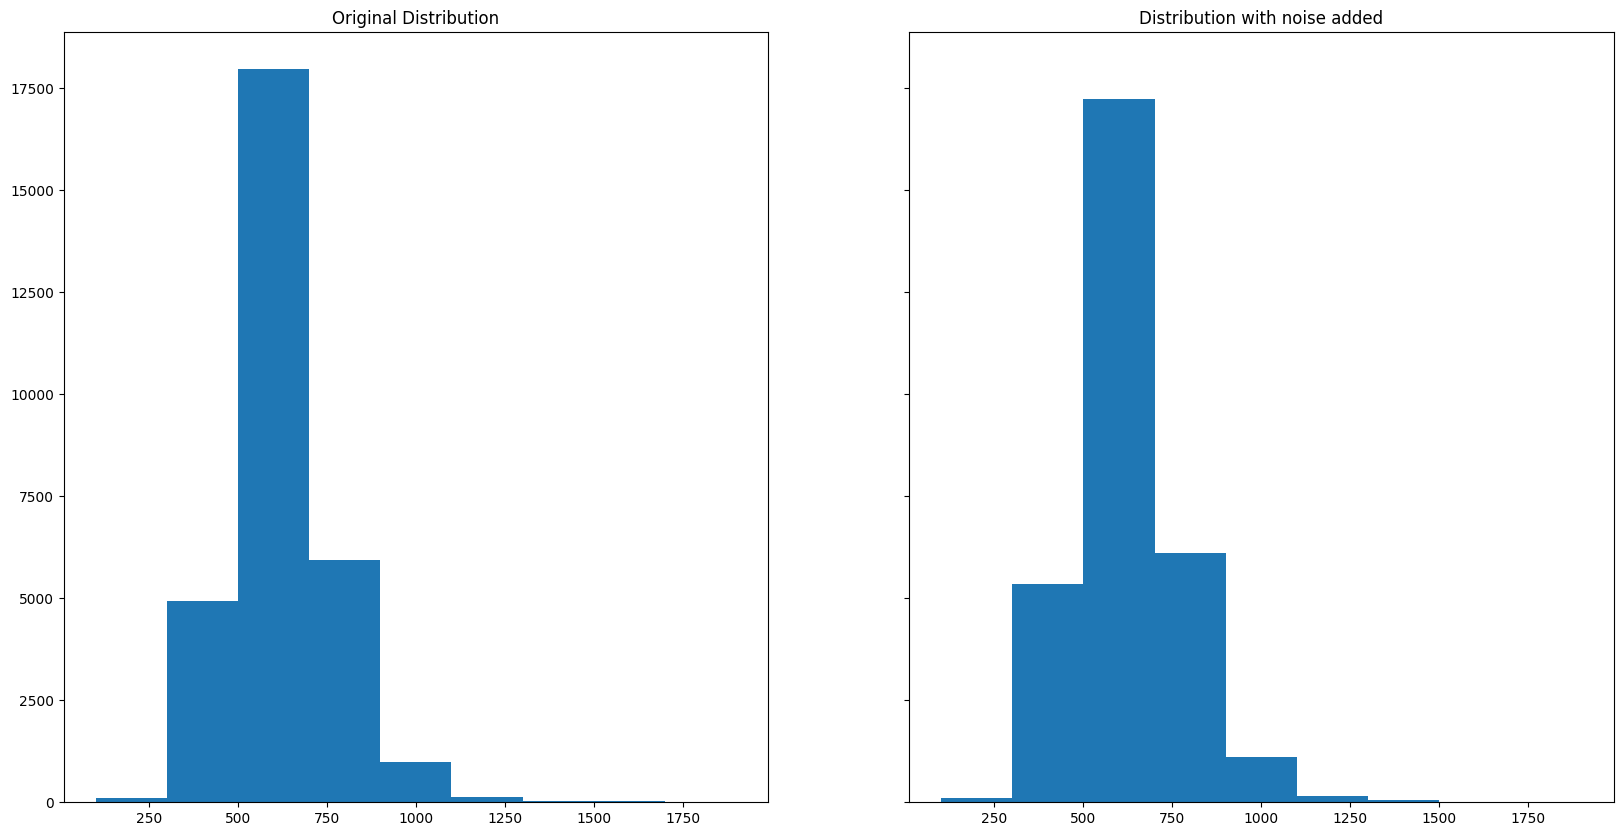

In [10]:
import matplotlib.pyplot as plt

# Analyze the non-missing numeric values after perturbation
stats_after_perturbation = {}
for column in columns_to_perturb:
    non_missing_values_after = [value for value in dataframe[column] if not pd.isna(value)]
    mean_after = np.mean(non_missing_values_after)
    std_dev_after = np.std(non_missing_values_after)
    stats_after_perturbation[column] = {'mean_after': mean_after, 'std_dev_after': std_dev_after}

print("\nAfter Perturbation:")
for column, stats in stats_after_perturbation.items():
    print(f"Mean {column} (After): {stats['mean_after']}")
    print(f"Std Dev {column} (After): {stats['std_dev_after']}")
    

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,10))
ax1.hist(
    'helen', 
    data=pd.read_csv('athletes.csv'),
    bins = np.arange(start=100, stop=2_000, step=200),
)
ax1.title.set_text('Original Distribution')
ax2.hist(
    'helen', 
    data=dataframe, 
    bins = np.arange(start=100, stop=2_000, step=200),
)
ax2.title.set_text('Distribution with noise added')

## 3.5 Data Analysis
Goal:
- Determine data loss using function (3.5.1)
- Discuss pros and cons (3.5.2)
- attributes included in the information loss function: ['pullups', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq'] 
- maybe aggregated values: age, height, weight, but they are not continious variables, so they wont be respected in the following informatiin loss function


The initial step involves reading two CSV files, 'athletes.csv' and 'athletes_og.csv', using the pandas library, in which the athletes_og.csv is the original file and the athletes.csv is the file containing the perturbed continuous values.
Aggregated, randomized and pseudonimized are not continuous and are therefore not considered in the Data Analysis.
The Continuous variables to be analysed are explicitly specified.
A function named 'calculate_information_loss' is defined to calculate the information loss between two arrays using the mean squared differences and a scaling factor.
Information loss is calculated for each column, aggregated, and then the total information loss is printed:

In [11]:
import pandas as pd
import numpy as np

# Read the CSV files

original_data = pd.read_csv("athletes.csv")
anonymized_data = pd.read_csv("athletes_anonyzmized.csv")

# Columns to calculate information loss
columns_to_compare = ['pullups', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq']

# Calculate Information Loss
def calculate_information_loss(x, y, S):
    return (x - y) / np.sqrt(2 * S)

total_information_loss = 0
n = len(original_data)  # Assuming both datasets have the same number of rows
p = len(columns_to_compare)  # Number of columns to compare

for column in columns_to_compare:
    x = original_data[column]
    y = anonymized_data[column]
    S = np.mean((x - y) ** 2)  # Variance of the differences in the column

    information_loss = np.sum(calculate_information_loss(x, y, S)) / (p * n)
    total_information_loss += information_loss

print("Total Information Loss:", total_information_loss)


/var/folders/4p/4kctgn5n2378x2bnhkqv4xpc0000gn/T/ipykernel_1332/4165263037.py:6: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv("athletes.csv")


Total Information Loss: -0.005497448255681514


/var/folders/4p/4kctgn5n2378x2bnhkqv4xpc0000gn/T/ipykernel_1332/4165263037.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  anonymized_data = pd.read_csv("athletes_anonyzmized.csv")
